<a href="https://colab.research.google.com/github/Sekash/CNN-brain-tumour/blob/main/version1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy

# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/final.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/final'
Training_dir = os.path.join(base_dir, 'Training')
Testing_dir = os.path.join(base_dir, 'Testing')
Validation_dir = os.path.join(base_dir, 'Validation')


train_glioma_dir = os.path.join(Training_dir, 'glioma')
train_meningioma_dir = os.path.join(Training_dir, 'meningioma')
train_notumor_dir = os.path.join(Training_dir, 'notumor')
train_pituitary_dir = os.path.join(Training_dir, 'pituitary')


testing_glioma_dir = os.path.join(Testing_dir, 'glioma')
testing_meningioma_dir = os.path.join(Testing_dir, 'meningioma')
testing_notumor_dir = os.path.join(Testing_dir, 'notumor')
testing_pituitary_dir = os.path.join(Testing_dir, 'pituitary')

validation_glioma_dir = os.path.join(Validation_dir, 'glioma')
validation_meningioma_dir = os.path.join(Validation_dir, 'meningioma')
validation_notumor_dir = os.path.join(Validation_dir, 'notumor')
validation_pituitary_dir = os.path.join(Validation_dir, 'pituitary')

In [ ]:
print('total training glioma images:', len(os.listdir(train_glioma_dir)))
print('total training meningioma images:', len(os.listdir(train_meningioma_dir)))
print('total training no tumor images:', len(os.listdir(train_notumor_dir)))
print('total training pituitary images:', len(os.listdir(train_pituitary_dir)))

print('total testing glioma images:', len(os.listdir(testing_glioma_dir)))
print('total testing meningioma images:', len(os.listdir(testing_meningioma_dir)))
print('total testing no tumor images:', len(os.listdir(testing_notumor_dir)))
print('total testing pituitary images:', len(os.listdir(testing_pituitary_dir)))

print('total validation glioma images:', len(os.listdir(validation_glioma_dir)))
print('total validation meningioma images:', len(os.listdir(validation_meningioma_dir)))
print('total validation no tumor images:', len(os.listdir(validation_notumor_dir)))
print('total validation pituitary images:', len(os.listdir(validation_pituitary_dir)))

total training glioma images: 1321
total training meningioma images: 1339
total training no tumor images: 1595
total training pituitary images: 1457
total testing glioma images: 150
total testing meningioma images: 153
total testing no tumor images: 203
total testing pituitary images: 150
total validation glioma images: 150
total validation meningioma images: 153
total validation no tumor images: 202
total validation pituitary images: 150


In [ ]:
total_testing_images = len(os.listdir(testing_glioma_dir)) + \
                       len(os.listdir(testing_meningioma_dir)) + \
                       len(os.listdir(testing_notumor_dir)) + \
                       len(os.listdir(testing_pituitary_dir))

total_training_images = len(os.listdir(train_glioma_dir)) + \
                        len(os.listdir(train_meningioma_dir)) + \
                        len(os.listdir(train_notumor_dir)) + \
                        len(os.listdir(train_pituitary_dir))

total_validation_images = len(os.listdir(validation_glioma_dir)) + \
                          len(os.listdir(validation_meningioma_dir)) + \
                          len(os.listdir(validation_notumor_dir)) + \
                          len(os.listdir(validation_pituitary_dir))
# Calculate the total number of images
total = total_training_images + total_testing_images + total_validation_images

# Calculate the percentage of each category
percentage_training = (total_training_images / total) * 100
percentage_testing = (total_testing_images / total) * 100
percentage_validation = (total_validation_images / total) * 100

# Print the total number of images in each category
print('Total training images:', total_training_images, 'Percentage:', percentage_training)
print('Total testing images:', total_testing_images, 'Percentage:', percentage_testing)
print('Total validation images:', total_validation_images, 'Percentage:', percentage_validation)

# Print the total number of images
print('Total:', total)


Total training images: 5712 Percentage: 81.33276377616403
Total testing images: 656 Percentage: 9.340737576534245
Total validation images: 655 Percentage: 9.326498647301722
Total: 7023


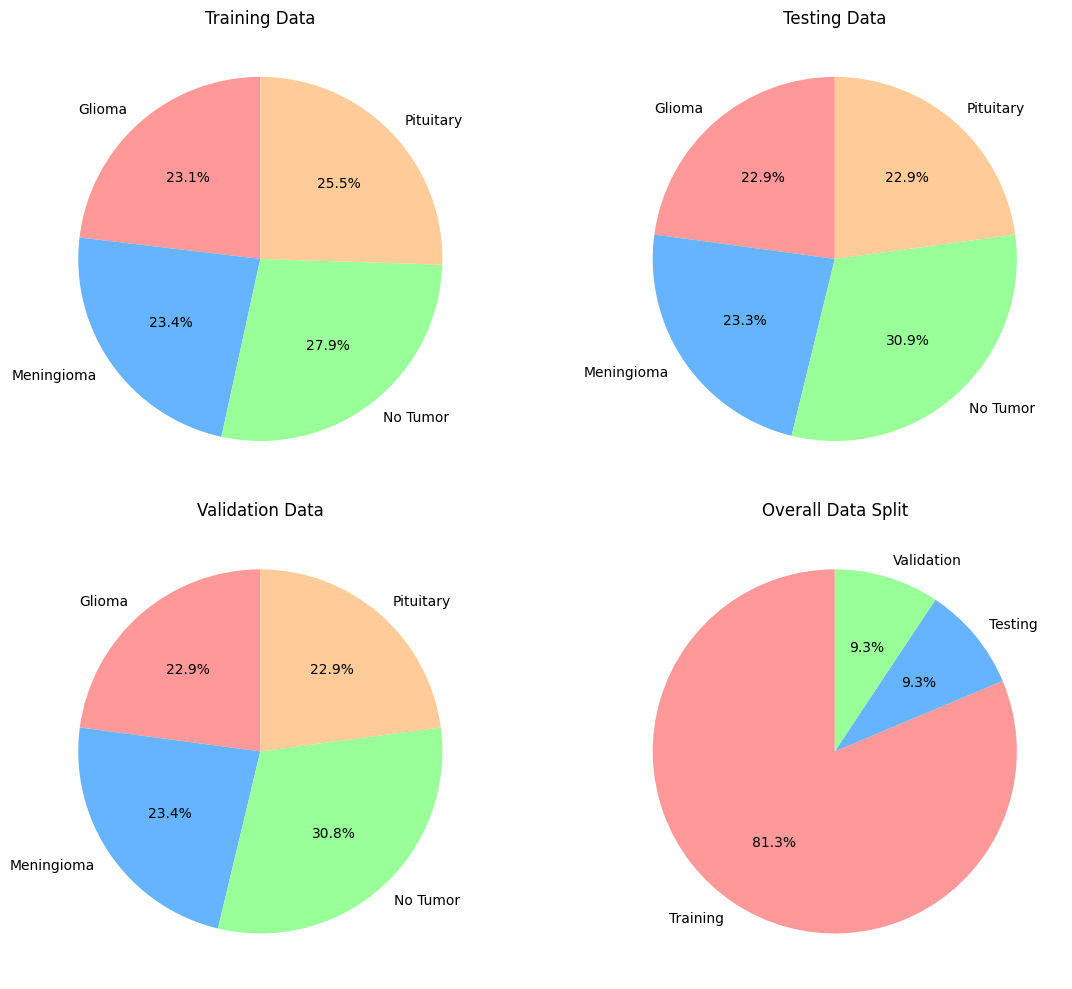

In [ ]:
import matplotlib.pyplot as plt

# Define data for each category
labels = ['Training', 'Testing', 'Validation']
sizes = [total_training_images, total_testing_images, total_validation_images]
colors = ['#ff9999', '#66b3ff', '#99ff99','#ffcc99']

labels_train = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
sizes_train = [
    len(os.listdir(train_glioma_dir)),
    len(os.listdir(train_meningioma_dir)),
    len(os.listdir(train_notumor_dir)),
    len(os.listdir(train_pituitary_dir))
]
labels_test = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
sizes_test = [
    len(os.listdir(testing_glioma_dir)),
    len(os.listdir(testing_meningioma_dir)),
    len(os.listdir(testing_notumor_dir)),
    len(os.listdir(testing_pituitary_dir))
]
labels_val = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
sizes_val = [
    len(os.listdir(validation_glioma_dir)),
    len(os.listdir(validation_meningioma_dir)),
    len(os.listdir(validation_notumor_dir)),
    len(os.listdir(validation_pituitary_dir))
]
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Training data
axs[0, 0].pie(sizes_train, labels=labels_train, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 0].set_title('Training Data')
# Testing data
axs[0, 1].pie(sizes_test, labels=labels_test, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0, 1].set_title('Testing Data')
# Validation data
axs[1, 0].pie(sizes_val, labels=labels_val, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 0].set_title('Validation Data')
# Overall data split
axs[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1, 1].set_title('Overall Data Split')
plt.tight_layout()
plt.show()


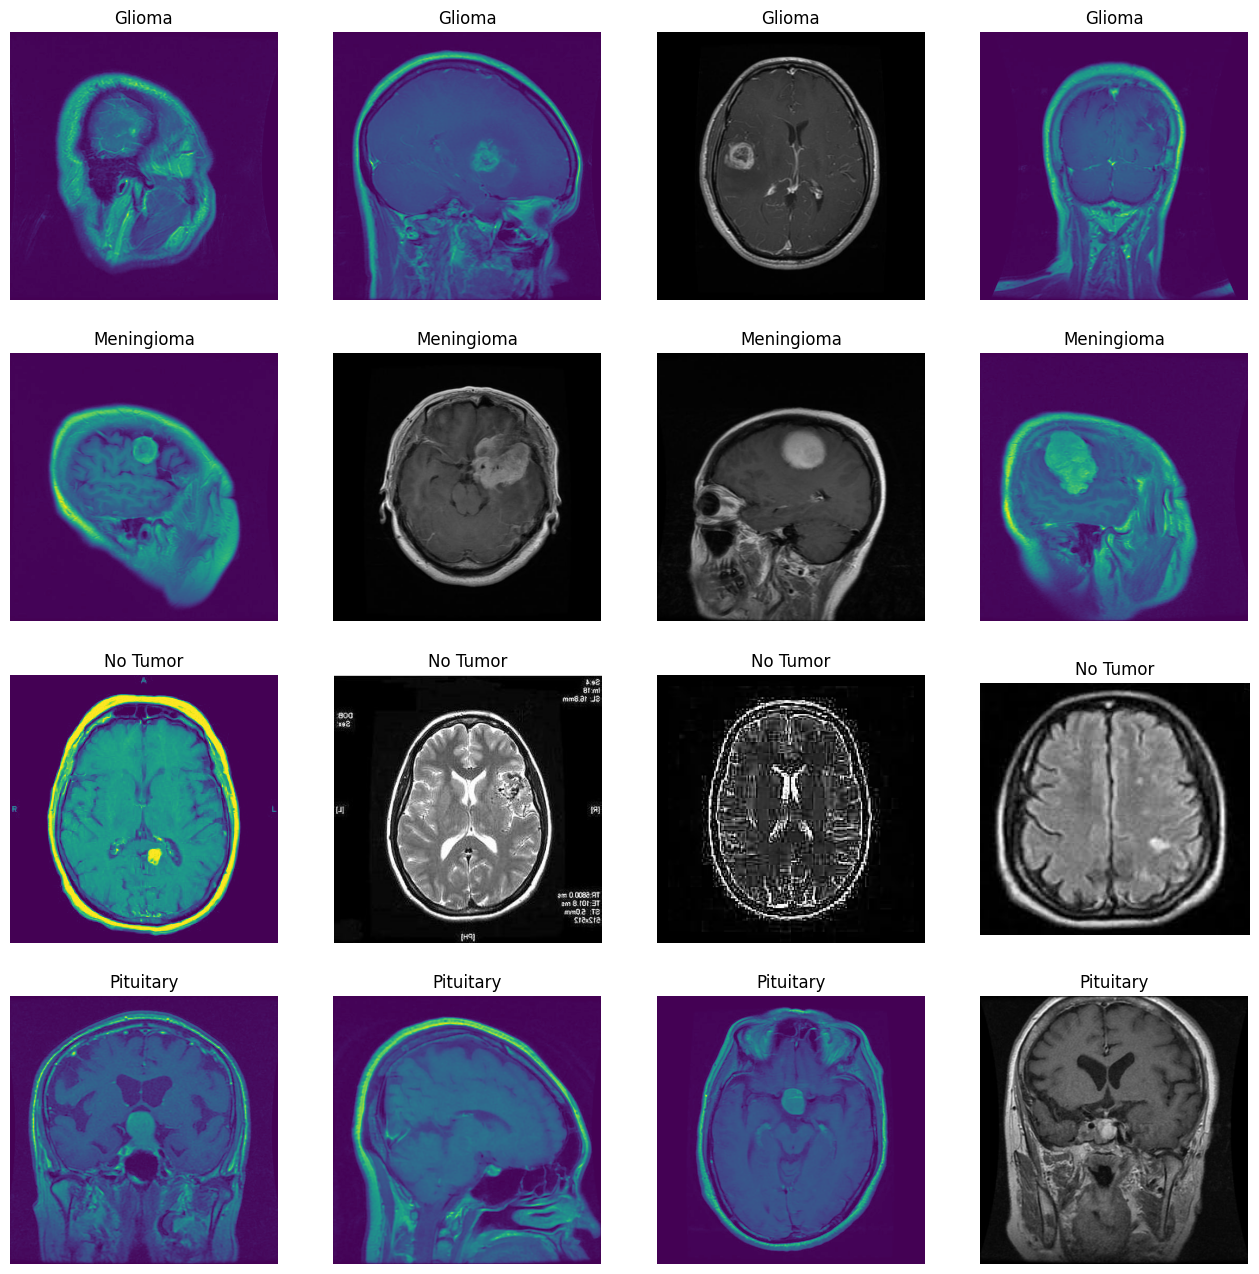

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
ncols = 4
nrows = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index = 0
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']


for class_dir, class_label in zip([train_glioma_dir, train_meningioma_dir, train_notumor_dir, train_pituitary_dir], class_labels):
    # Get the list of image filenames for the current class
    class_fnames = os.listdir(class_dir)

    # Get the next set of four image paths for the current class
    next_class_pix = [os.path.join(class_dir, fname) for fname in class_fnames[pic_index:pic_index + 4]]
    for i, img_path in enumerate(next_class_pix):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, pic_index + 1)
        sp.axis('Off')  # Don't show axes (or gridlines
        # Read the image and display it
        img = mpimg.imread(img_path)
        plt.imshow(img)
        # Add label below the image
        plt.title(class_label)
        pic_index += 1

# Show the plot
plt.show()


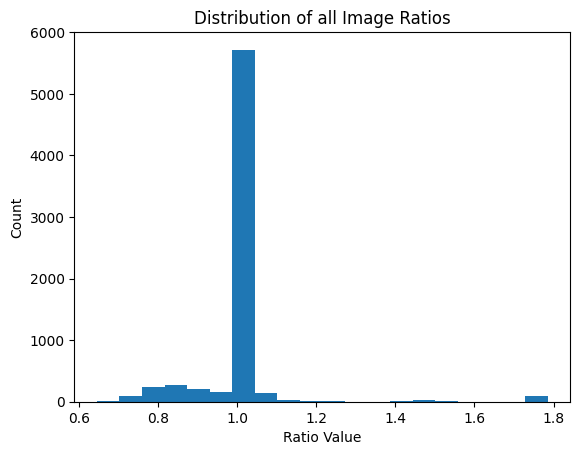

Images without an aspect ratio of 1:
1535


In [ ]:
RATIO_LIST = []
counter = 0

# iterate over each set of images (training, testing, validation)
for image_set in [train_notumor_dir, testing_notumor_dir, validation_notumor_dir,
                  train_glioma_dir, testing_glioma_dir, validation_glioma_dir,train_meningioma_dir,
                  testing_meningioma_dir, validation_meningioma_dir, train_pituitary_dir,
                  testing_pituitary_dir, validation_pituitary_dir]:
    # Iterate over each image in the set
    for img_filename in os.listdir(image_set):
        # Construct the full path to the image
        img_path = os.path.join(image_set, img_filename)

        # Load the image using matplotlib
        img = mpimg.imread(img_path)

        # calculate and store the aspect ratio (width / height)
        ratio = img.shape[1] / img.shape[0]  # Width / Height
        RATIO_LIST.append(ratio)
        if ratio != 1:
          counter += 1

# plot the distribution of image ratios
plt.hist(RATIO_LIST, bins=20)  # Adjust the number of bins as needed
plt.title('Distribution of all Image Ratios')
plt.xlabel('Ratio Value')
plt.ylabel('Count')
plt.show()
print("Images without an aspect ratio of 1:")
print(counter)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from keras.models import Model

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.models import Model

# Input layer
img_input = Input(shape=(150, 150, 3))

# First convolutional layer and max-pooling layer
x = Conv2D(16, (3, 3))(img_input)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3))(x)

# Second convolutional layer and max-pooling layer
x = Conv2D(32, (3, 3))(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3))(x)

# Third convolutional layer and max-pooling layer
x = Conv2D(64, (4, 4))(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3))(x)

# Fourth convolutional layer
x = Conv2D(128, (4, 4))(x)
x = Activation('relu')(x)

# Flatten layer
x = Flatten()(x)

# Fully connected layers with dropout
x = Dense(512)(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)  # Dropout added here

# Output layer
output = Dense(4, activation='softmax')(x)

# Define the model
model = Model(img_input, output)

# Print the summary of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 activation (Activation)     (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 activation_1 (Activation)   (None, 47, 47, 32)        0         
                                                             

In [ ]:
#from keras.optimizers import RMSprop
#from keras.optimizers import Adam

#model.compile(loss='categorical_crossentropy',
#              optimizer=RMSprop(learning_rate=0.001,
#                                rho=0.9,
#                                momentum=0.0,
#                                epsilon=1e-07,
#                                centered=False,
#                                weight_decay=None,
#                                clipnorm=None,
#                                clipvalue=None,
#                                global_clipnorm=None,
#                                use_ema=False,
#                                ema_momentum=0.99,
#                               ema_overwrite_frequency=100),
#              metrics=['accuracy'])


In [ ]:
#from keras.optimizers import RMSprop
#from keras.optimizers import Adam#

#model.compile(loss='categorical_crossentropy',
#              optimizer=Adam(learning_rate=0.001,
#                                beta_1=0.9,
#                                beta_2=0.999,
#                                epsilon=1e-07,
#                                amsgrad=False,
#                                weight_decay=None,
#                                clipnorm=None,
#                                clipvalue=None,
#                                global_clipnorm=None,
#                                use_ema=False,
#                                ema_momentum=0.99,
#                                ema_overwrite_frequency=None),
#              metrics=['accuracy'])

In [ ]:
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.optimizers import SGD

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate = 0.01,
                              momentum = 0.9,
                              nesterov = True,
                              weight_decay = None,
                              clipnorm = None,
                              clipvalue = None,
                              global_clipnorm = None,
                              use_ema = False,
                              ema_momentum = 0.99,
                              ema_overwrite_frequency = None),
              metrics=['accuracy'])

In [ ]:
#DATA AUGMENTATION version 1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator1 = train_datagen.flow_from_directory(
        Training_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


validation_generator1 = val_datagen.flow_from_directory(
        Validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    Testing_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size = 20,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 655 images belonging to 4 classes.
Found 656 images belonging to 4 classes.


In [ ]:
#DATA AUGMENTATION version 2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
val_datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=10,
                                   brightness_range=(0.9, 1.2),
                                   width_shift_range=0.005,
                                   height_shift_range=0.005,
                                   shear_range=12.5,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   brightness_range=(0.9, 1.2),
                                   width_shift_range=0.005,
                                   height_shift_range=0.005,
                                   shear_range=12.5,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        Training_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')


validation_generator = val_datagen.flow_from_directory(
        Validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    Testing_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size = 20,
    class_mode='categorical',
    shuffle=False #needed to stop confusion matrix
)

Found 5712 images belonging to 4 classes.
Found 655 images belonging to 4 classes.
Found 656 images belonging to 4 classes.


In [ ]:
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())
# Displaying categorical types
print("Categorical types for the training data:")
print(class_indices_train)

Categorical types for the training data:
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


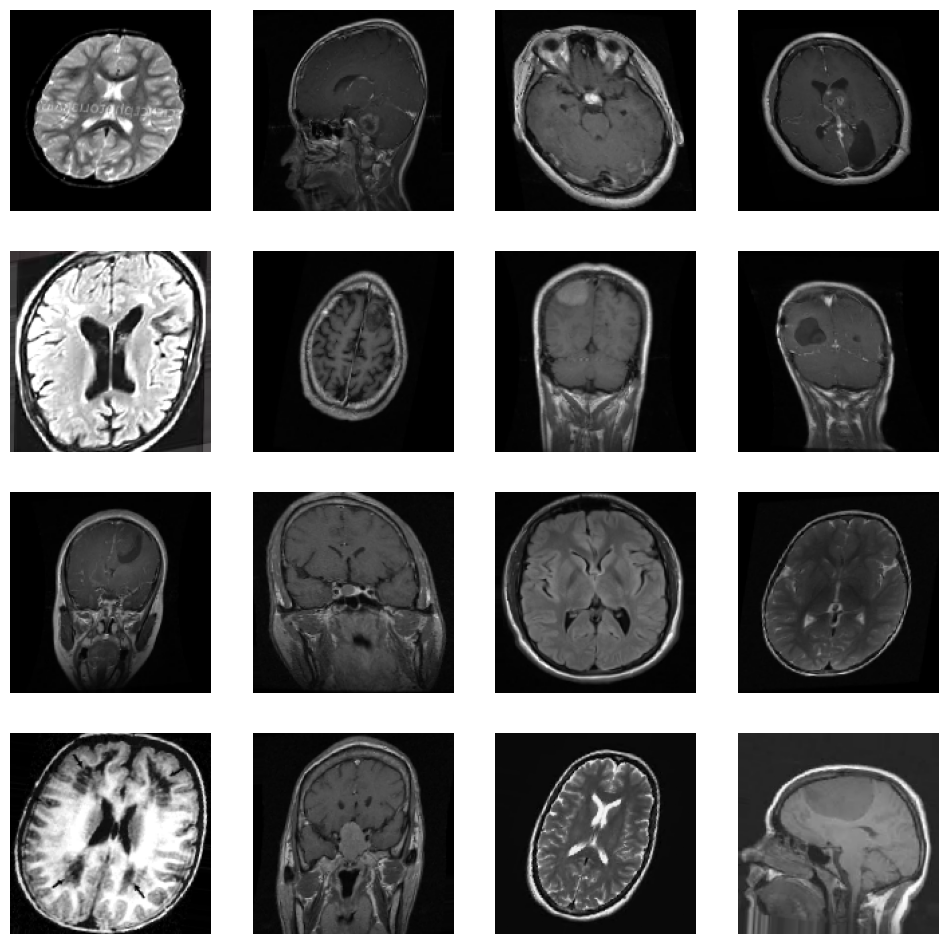

In [ ]:
import matplotlib.pyplot as plt

# Generate augmented images
augmented_images = next(train_generator)

# Plot a few samples of augmented images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(augmented_images[0][i])
    ax.axis('off')
plt.show()


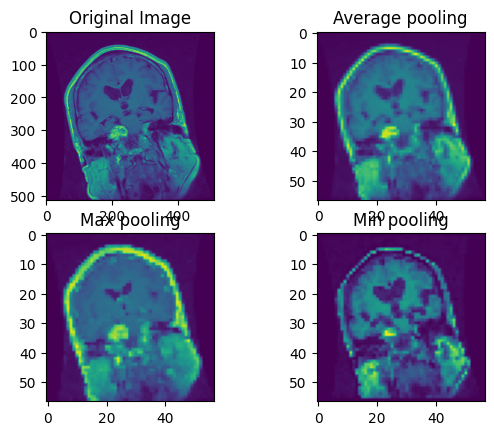

In [ ]:
from skimage.measure import block_reduce
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/final/Testing/meningioma/Te-me_0165.jpg')
mean_pool=block_reduce(img, block_size=(9,9), func=np.mean)
max_pool=block_reduce(img, block_size=(9,9), func=np.max)
min_pool=block_reduce(img, block_size=(9,9), func=np.min)

plt.figure(1)
plt.subplot(221)
imgplot = plt.imshow(img)
plt.title('Original Image')

plt.subplot(222)
imgplot3 = plt.imshow(mean_pool)
plt.title('Average pooling')

plt.subplot(223)
imgplot1 = plt.imshow(max_pool)
plt.title('Max pooling')

plt.subplot(224)
imgplot1 = plt.imshow(min_pool)
plt.title('Min pooling')

plt.show()

In [ ]:
img = imread('/content/final/Testing/meningioma/Te-me_0165.jpg')
print(img.shape[1],img.shape[0])

512 512


In [ ]:
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=True)

In [ ]:
train_samples = 5712
batch_size = 20
validation_samples = 655
train_steps_per_epoch = train_samples // batch_size
validation_steps_per_epoch = validation_samples // batch_size
#for mini batch
#train_steps_per_epoch = len(train_generator)
#validation_steps_per_epoch = len(validation_generator)

history = model.fit(
      train_generator,
      steps_per_epoch= train_steps_per_epoch,
      epochs= 40,
      validation_data=validation_generator,
      validation_steps=validation_steps_per_epoch,
      callbacks=[model_es, model_rlr])

Epoch 1/40
285/285 [==============================] - 136s 474ms/step - loss: 0.9736 - accuracy: 0.5794 - val_loss: 1.0258 - val_accuracy: 0.6000 - lr: 0.0100
Epoch 2/40
285/285 [==============================] - 128s 449ms/step - loss: 0.6447 - accuracy: 0.7386 - val_loss: 0.5114 - val_accuracy: 0.7844 - lr: 0.0100
Epoch 3/40
285/285 [==============================] - 131s 459ms/step - loss: 0.5170 - accuracy: 0.7895 - val_loss: 0.5287 - val_accuracy: 0.7625 - lr: 0.0100
Epoch 4/40
285/285 [==============================] - 133s 465ms/step - loss: 0.4368 - accuracy: 0.8280 - val_loss: 0.4735 - val_accuracy: 0.8266 - lr: 0.0100
Epoch 5/40
285/285 [==============================] - 127s 445ms/step - loss: 0.3938 - accuracy: 0.8524 - val_loss: 0.4613 - val_accuracy: 0.8234 - lr: 0.0100
Epoch 6/40
285/285 [==============================] - 129s 452ms/step - loss: 0.3300 - accuracy: 0.8818 - val_loss: 0.3173 - val_accuracy: 0.8625 - lr: 0.0100
Epoch 7/40
285/285 [==========================

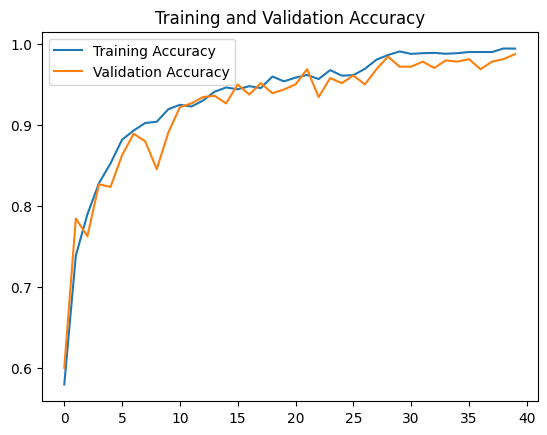

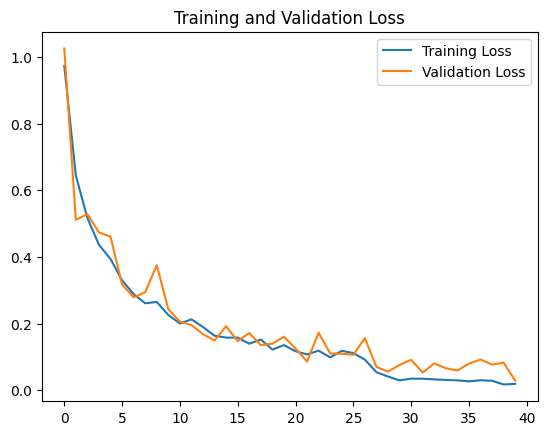

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(accuracy))

# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
total_testing_samples = 656

# Calculate the number of steps per epoch for testing
testing_steps = total_testing_samples // batch_size

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(test_generator, steps=testing_steps)

# Print the testing loss and accuracy
print("Testing Loss:", test_loss)
print("Testing Accuracy:", test_accuracy)

32/32 [==============================] - 3s 95ms/step - loss: 0.0588 - accuracy: 0.9797
Testing Loss: 0.058769095689058304
Testing Accuracy: 0.979687511920929


In [ ]:
total_testing_samples = 655

testing_steps = total_testing_samples // batch_size

val_loss, loss_accuracy = model.evaluate(validation_generator, steps=testing_steps)

print("val Loss:", val_loss)
print("val Accuracy:", val_accuracy)

32/32 [==============================] - 9s 282ms/step - loss: 0.0614 - accuracy: 0.9781
val Loss: 0.0614023320376873
val Accuracy: [0.6000000238418579, 0.784375011920929, 0.762499988079071, 0.8265625238418579, 0.823437511920929, 0.862500011920929, 0.8890625238418579, 0.879687488079071, 0.8453124761581421, 0.890625, 0.921875, 0.926562488079071, 0.934374988079071, 0.9359375238418579, 0.926562488079071, 0.949999988079071, 0.9375, 0.9515625238418579, 0.9390624761581421, 0.9437500238418579, 0.949999988079071, 0.96875, 0.934374988079071, 0.957812488079071, 0.9515625238418579, 0.9609375, 0.949999988079071, 0.96875, 0.984375, 0.971875011920929, 0.971875011920929, 0.9781249761581421, 0.9703124761581421, 0.979687511920929, 0.9781249761581421, 0.981249988079071, 0.96875, 0.9781249761581421, 0.981249988079071, 0.987500011920929]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

class_labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Calculate precision, recall, and F1-score for each class
precision_scores = precision_score(true_labels, predicted_labels, average=None)
recall_scores = recall_score(true_labels, predicted_labels, average=None)
f1_scores = f1_score(true_labels, predicted_labels, average=None)

# Print the metrics for each class
for i, class_label in enumerate(class_labels):
    print(f"Metrics for class '{class_label}':")
    print(f"Precision: {precision_scores[i]}")
    print(f"Recall: {recall_scores[i]}")
    print(f"F1-score: {f1_scores[i]}")
    print()


33/33 [==============================] - 3s 94ms/step
Metrics for class 'glioma':
Precision: 0.9930555555555556
Recall: 0.9533333333333334
F1-score: 0.9727891156462586

Metrics for class 'meningioma':
Precision: 0.949685534591195
Recall: 0.9869281045751634
F1-score: 0.9679487179487181

Metrics for class 'notumor':
Precision: 0.9902439024390244
Recall: 1.0
F1-score: 0.9950980392156863

Metrics for class 'pituitary':
Precision: 0.9864864864864865
Recall: 0.9733333333333334
F1-score: 0.9798657718120806



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=class_indices_train_list))

Accuracy: 0.9801829268292683
Precision: 0.9805681483138431
Recall: 0.9801829268292683
F1 Score: 0.9801818428745259
Classification Report:
              precision    recall  f1-score   support

      glioma       0.99      0.95      0.97       150
  meningioma       0.95      0.99      0.97       153
     notumor       0.99      1.00      1.00       203
   pituitary       0.99      0.97      0.98       150

    accuracy                           0.98       656
   macro avg       0.98      0.98      0.98       656
weighted avg       0.98      0.98      0.98       656



33/33 [==============================] - 4s 118ms/step


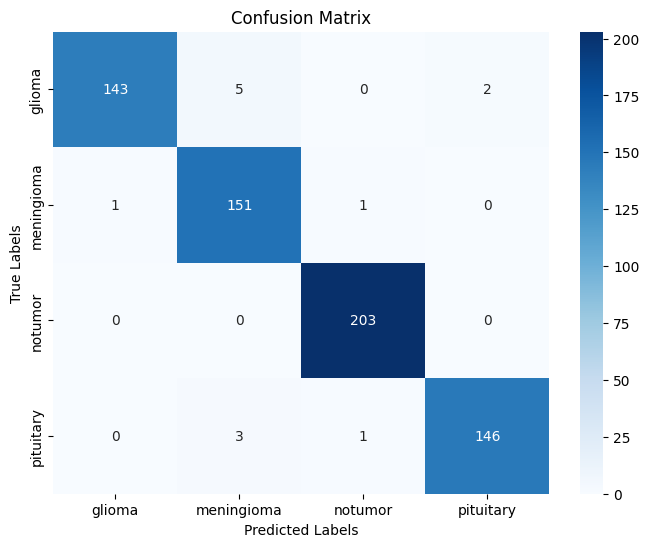

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes

conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_labels = list(test_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


33/33 [==============================] - 4s 107ms/step


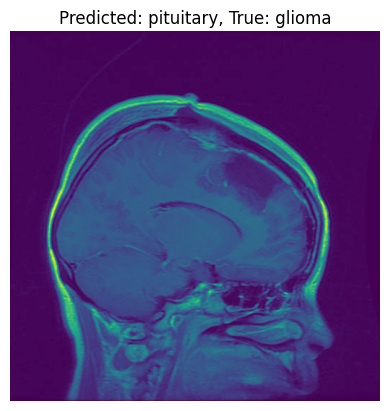

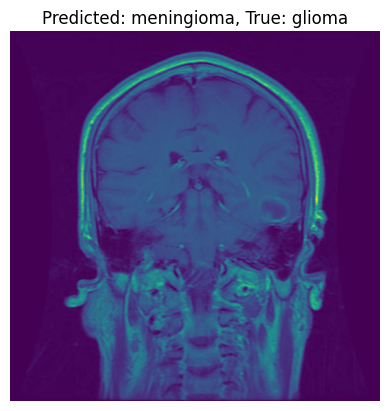

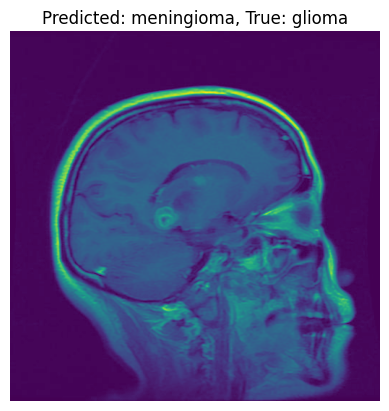

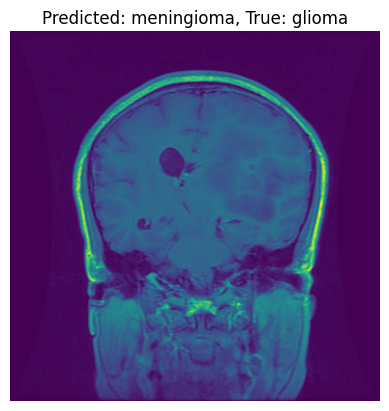

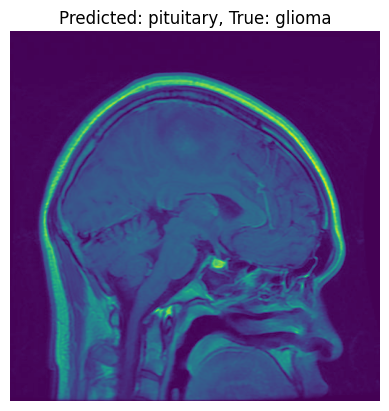

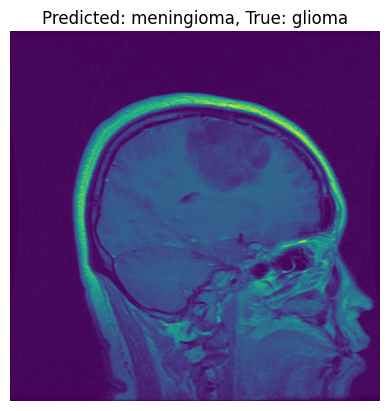

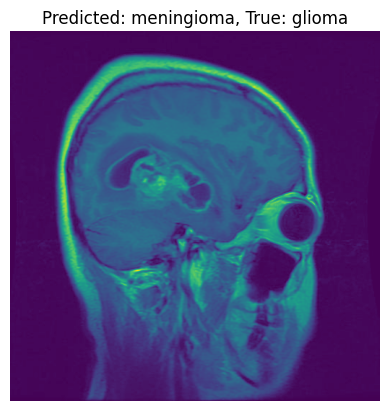

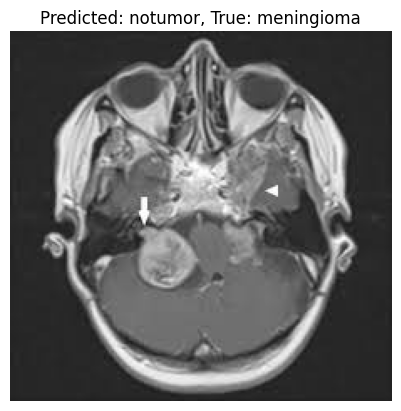

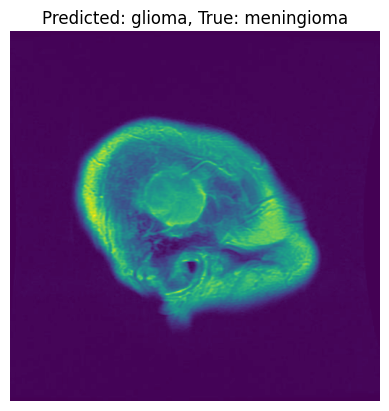

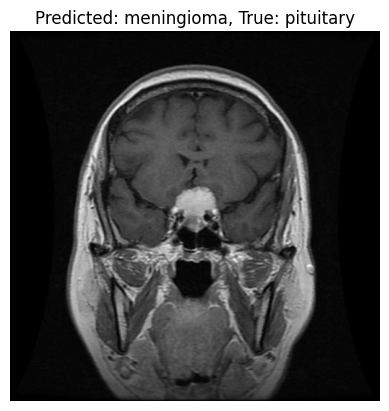

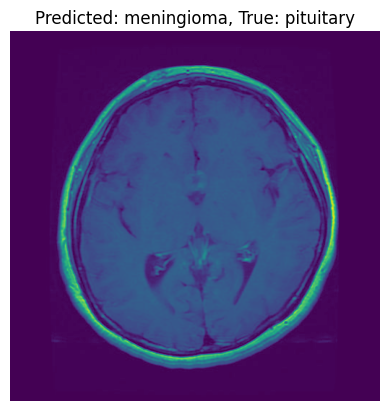

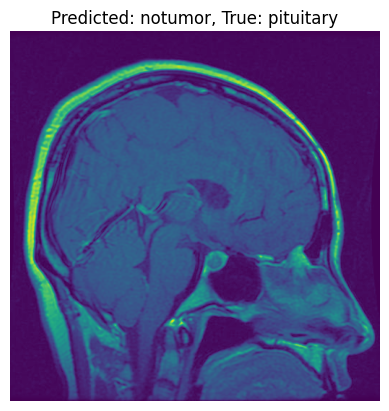

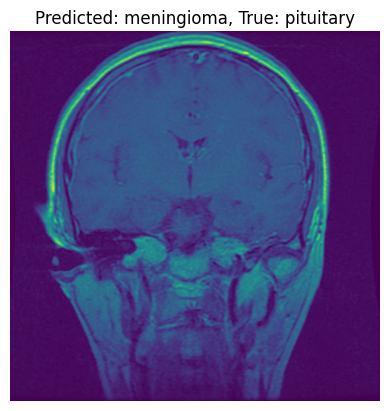

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = test_generator.classes
misclassified_indices = np.where(predicted_labels != true_labels)[0]
# Visualize misclassified images

for index in misclassified_indices:
    img = plt.imread(test_generator.filepaths[index])
    predicted_label = class_labels[predicted_labels[index]]
    true_label = class_labels[true_labels[index]]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()


In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.6 MB/s eta 0:00:00


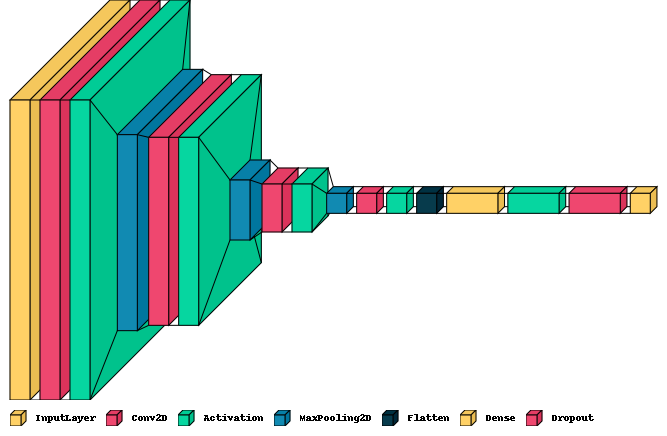

In [ ]:
from visualkeras import layered_view
layered_view(model, legend=True, max_xy=300)